### Упражнение 2.1

Я ознакомился с приведенными примерами.

### Упражнение 2.2

Пилообразный сигнал линейно нарастает от -1 до 1, а затем резко падает до -1 и повторяется. 
Напишите класс, называемый SawtoothSignal, расширяющий signal и предоставляющий evaluate для оценки пилообразного сигнала.
Вычислите спектр пирообразного сигнала. 
Как соотносится его гармоническая структура с треугольным и прямоугольным сигналами?

### Решение

Подключу библиотеки

In [1]:
import os
import numpy as np

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/Yuichir0/Telecom/tree/main/thinkdsp.py

from thinkdsp import Sinusoid, unbias, normalize, TriangleSignal, SquareSignal

Sinusoid уже предоставляет несколько методов, которые нужно реализовать для написания функции evaluate, поэтому я буду использовать его методы для удобства

In [2]:
class SawtoothSignal(Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

Вот как звучит SawtoothSignal (Рекомендую уменьшить громкость)

In [3]:
sawtooth = SawtoothSignal().make_wave(duration=1, framerate=4200)
sawtooth.make_audio()

Построю спектограмму сигнала

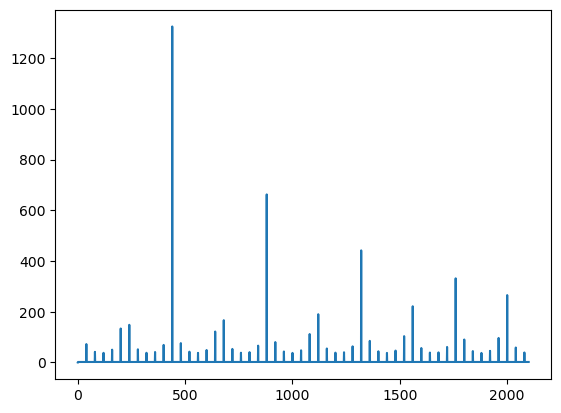

In [4]:
sawtooth.make_spectrum().plot()

Построю прямоугольную спектрограмму

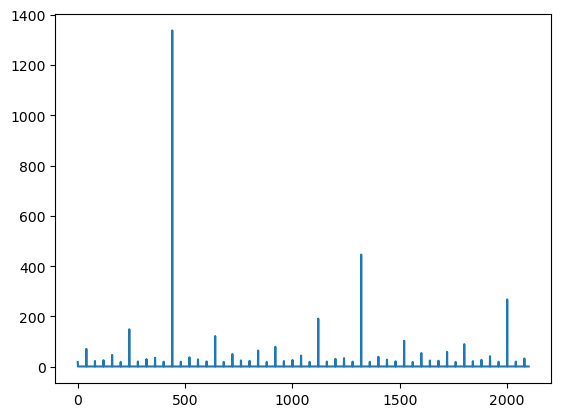

In [5]:
square = SquareSignal(amp=0.5).make_wave(duration=1, framerate=4200)
square.make_spectrum().plot()

Прямоугольный сигнал имеет в 2 раза меньше пиков частот, по сравнению с пирообразным

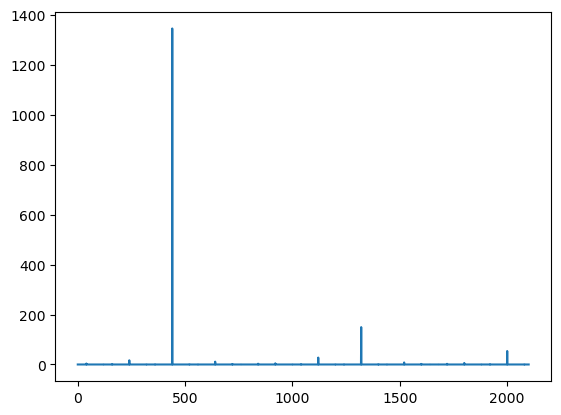

In [6]:
triangle = TriangleSignal(amp=0.79).make_wave(duration=1, framerate=4200)
triangle.make_spectrum().plot()

Треугольный сигнал спадает еще быстрее, если пирообразный сигнал спадает со скоростью 1/f, то треугольный - 1/f^2

### Упражнение 2.3
Создайте прямоугольный сигнал 1100 Гц и вычислите wave с выборками 10 000 кадров в секунду. Постройте спектр и убедитесь, что большинство гармоник "завернуты" из-за биений. Слышны ли последствия этого при проигрывании

### Решение
Построю спектрограмму сигнала по заданию и оценю ее пики?

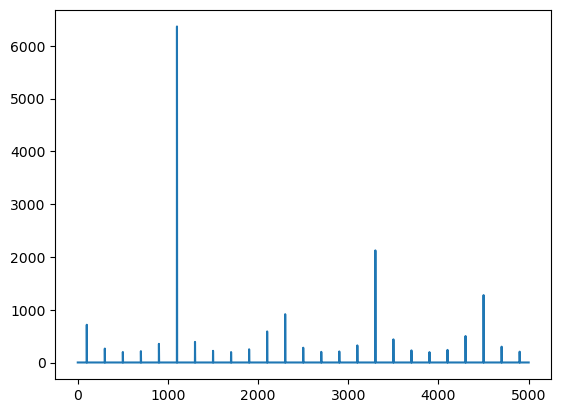

In [7]:
sqSignal = SquareSignal(1100)
sqSegment = sqSignal.make_wave(duration=1, framerate=10000)
sqSpectrum = sqSegment.make_spectrum()
sqSpectrum.plot()

In [8]:
sqSpectrum.peaks()[:5]

[(6367.182534102138, 1100.0),
 (2125.0234754609446, 3300.0),
 (1278.179301804898, 4500.0),
 (916.3945635352014, 2300.0),
 (716.3133230172565, 100.0)]

2-ая гармоника ожидаемо находится на частоте 3300, 3-ая на частоте 4500 из-за завертывания, 4-ая была бы на частоте 7700, но так как завертывание уже произошло на 5500, остается 7700-5500=2200 частота, 4500-2200=2300 - частота 4-ой гармоники. В итоге 5-ая гармоника оказывается на частоте 100

In [9]:
sqSegment.make_audio()

Сложно оценить последствия завертывания с одним аудио, поэтому сделаю еще одно

In [10]:
sqSegment2 = sqSignal.make_wave(duration=1, framerate=42000)
sqSpectrum2 = sqSegment2.make_spectrum()
sqSegment2.make_audio()

Завертывание явно слышимо в первом примере - оно имеет меньше высоких частот и больше низких

### Упражнение 2.4
Возьмите объект Spectrum и распечатайте несколько первых значений spectrum.fs. Убедитесь, что они начинаются с нуля, то есть Spectrim.hs[0] - амплитута компоненты с частотой 0. Но что это значит?

Проведите такой эксперимент:

1. Создайте треугольный сигнал с частотой 440 Гц и wave длительностью 0,01 секунд. Распечатайте сигнал.
2. Создайте объект Spectrum и распечатайте Spectrum.hs[0]. Каковы амплитуда и фаза этого коспонента?
3. Установите Spectrum.hs[0] = 100. Как эта операция повлияет на сигнал? Подсказка: Spectrum дает метод, называемый make_wave, вычисляющий wave, соответствующий Spectrum.

### Решение

1. Создам треугольный сигнал

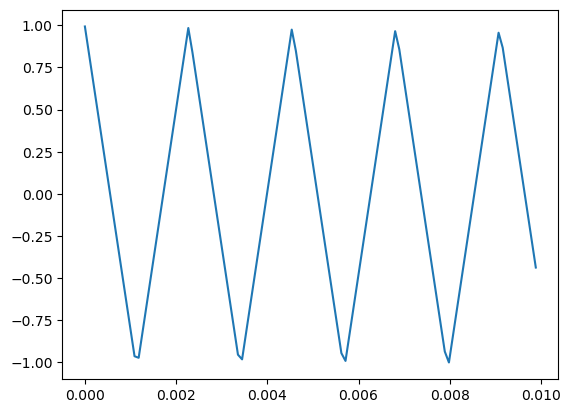

In [11]:
triangle = TriangleSignal().make_wave(duration=0.01)
triangle.plot()

2. Создам спектрум

In [12]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

3. Установлю значение спектрума[0] = 100

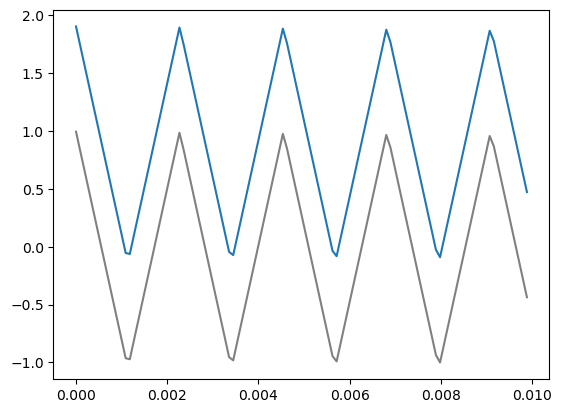

In [13]:
spectrum.hs[0] = 100
triangle.plot(color='gray')
spectrum.make_wave().plot()

Как можно заметить, нулевой элемент отвечает за смещение амплитуды -  при установке значения = 100 звук стал громче, выше на диаграмме

### Упражнение 2.5

Напишите функцию, принимающую Spectrum как параметр и изменяющую его делением каждого элемента hs на соответсвующую частоту из fs. Подсказка: поскольку деление на ноль не определено, надо задать Spectrum.hs[0] = 0.

Проверьте эту функцию, используя прямоугольный, треугольный или пилообразный сигналы:

1. Вычислите Spectrum и распечатайте его.
2. Измените Spectrum, вновь используя свою функцию, и распечатайте его.
3. Используйте Spectrum.make_wave, чтобы сделать wave из измененного Spectrum, и прослушайте его. Как эта операция повлияла на сигнал?

### Решение

Напишу функцию 

In [14]:
def divide_spectrum(spectrum):
    spectrum.hs[0] = 0
    spectrum.hs[1:] /= spectrum.fs[1:]

Воспользуюсь прямоугольными сигналами

Применю функцию из задания и сравню отличия

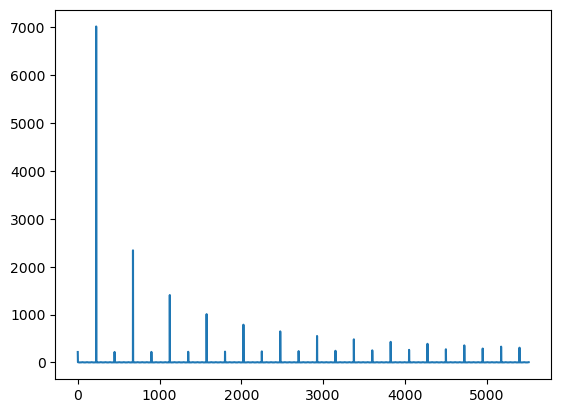

In [15]:
wave = SquareSignal(freq=225).make_wave(duration=1)
spectrum = wave.make_spectrum()
spectrum.plot(high=10000)

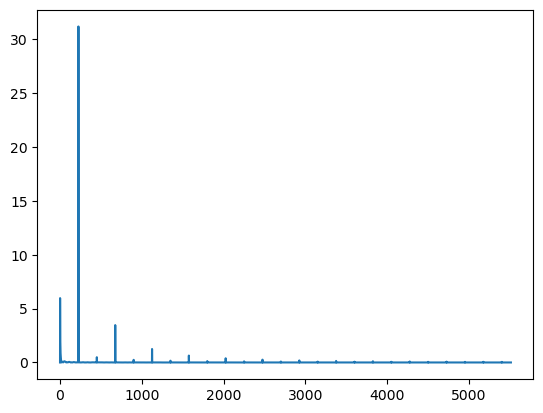

In [16]:
divide_spectrum(spectrum)
spectrum.plot(high=10000)

Как можно заметить, амплитуда всех звуков сильно уменьшилась, когда частоты гармоник остались неизменны
Прослушаем результат

In [17]:
wave.make_audio()

In [18]:
dvSpectrum = spectrum.make_wave()
dvSpectrum.make_audio()

Результат похож на работу высокочастотного фильтра - верхние частоты сильно пригнушены, что делает звук более низким

### Упражнение 2.6
У треугольных и прямоугольных сигналах есть только нечентые гармоники; в пилообразном сигнале есть и четные, и нечетные гармоники. Гармоники прямоугольных и пилообразных сигналов уменьшаются пропорционально 1/f; гармоники треугольных сигналов - пропорционально 1/f^2. Можно ли найти сигнал, состоящий из четных и нечетных гармоник, спадающих пропорционально 1/f^2?

Подсказка: для этого есть два способа. Можно собрать желаемый сигнал из синусоид, а можно взять сигнал со спектром похожим на необходимый, и изменять его параметры.

### Решение

Подсказка намекает на возможность использования пилообразного сигнала - воспользуюсь им

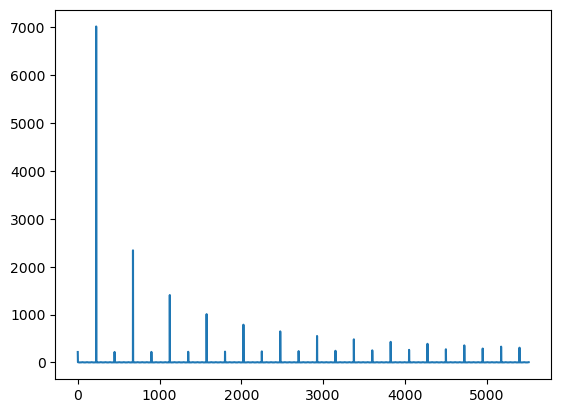

In [32]:
signal = SawtoothSignal(freq=225)
spectrum = wave.make_spectrum()
spectrum.plot()

Как можно заметить, пилообразный сигнал спадает со скоростью 1/f. 
Сделанная в предыдущем пункте функция по сути просто делит все частоты на f, поспользовавшись ей получу сигнал спадающий со скоростью 1/f^2

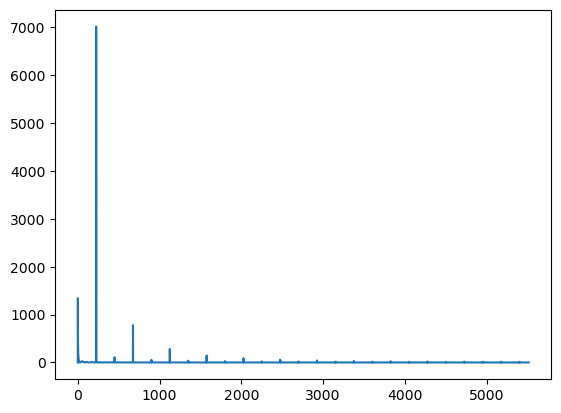

In [33]:
divide_spectrum(spectrum)
spectrum.scale(225)
spectrum.plot()

In [34]:
spectrum.peaks()[:5]

[(7019.745526638926, 225.0),
 (1344.3911272445373, 1.0),
 (780.8731511898621, 675.0),
 (663.8172094375042, 2.0),
 (433.3129110712449, 3.0)]

Как можно увидеть, в сигнале присутствуют четные и нечетные гармоники, однако из-за шума в начале их нельзе увидеть при отображении - отфильтрую шум

[(7019.745526638926, 225.0),
 (780.8731511898621, 675.0),
 (281.7660430150462, 1125.0),
 (144.26037693042215, 1575.0),
 (109.73795135650442, 450.0)]

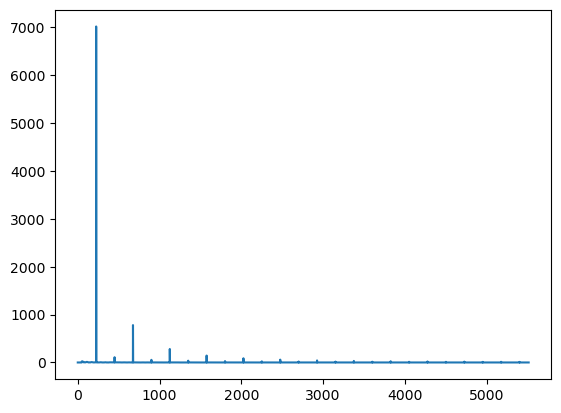

In [35]:
spectrum.high_pass(50)
spectrum.plot()
spectrum.peaks()[:5]

In [ ]:
Теперь результат видем и графически, и в выводе .peaks